# Qiskit  v2.X Developer Exam

In [ ]:
# Uncomment to install the necessary packages

%pip install --upgrade pip
%pip install numpy==2.3.4
%pip install scipy==1.16.2
%pip install matplotlib==3.10.7
%pip install jupyter
%pip install qiskit[visualization]==2.2
# # For Local Linux or Mac, you can use the following command:
# # %pip install 'qiskit[visualization]'==2.2
%pip install qiskit_algorithms==0.4.0
%pip install qiskit_aer==0.17.2
%pip install qiskit_ibm_runtime==0.41.1
%pip install qiskit_ibm_transpiler==0.14.3

In [26]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector, Operator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService

---
## Section 1: Perform quantum operations (16%)
- https://quantum.cloud.ibm.com/docs/guides/operators-overview
- https://quantum.cloud.ibm.com/docs/en/guides/operator-class

![title](img/1.png)

In [ ]:
# Answer: a) first position is the external space, and second the internal subspace

In [29]:
p = Pauli("IZ")
print(p.to_matrix())


[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [30]:
Operator(p)

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


![title](img/2.png)

In [ ]:
# Answer: d) pi/4 phase, to 1+i/N

In [25]:
from qiskit.circuit.library import TGate

t_gate = TGate()
print(t_gate.to_matrix())

[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]


In [31]:
Operator(t_gate)

Operator([[1.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.70710678+0.70710678j]],
         input_dims=(2,), output_dims=(2,))


In [32]:
q = QuantumCircuit(1)
q.t(0)

Operator(q)

Operator([[1.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.70710678+0.70710678j]],
         input_dims=(2,), output_dims=(2,))


![title](img/3.png)

In [ ]:
# Answer d) Half half

In [42]:
from qiskit.circuit.library import RYGate

RYGate(np.pi / 2).to_matrix() @ (1, 0)  # state|0> = (1,0)

array([0.70710678+0.j, 0.70710678+0.j])

In [89]:
qc = QuantumCircuit(1)
qc.ry(np.pi / 2, 0)
Operator(qc)

Operator([[ 0.70710678+0.j, -0.70710678+0.j],
          [ 0.70710678+0.j,  0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


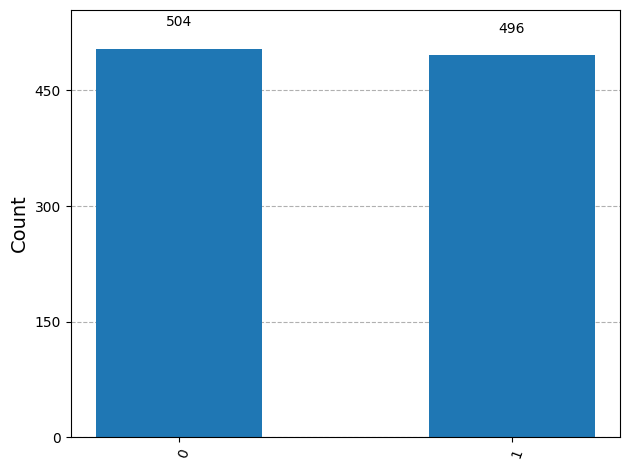

In [36]:
qc = QuantumCircuit(1)
qc.reset(0)
qc.ry(np.pi / 2, 0)
qc.measure_all()

simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)

### TASK 1.1: Define Pauli Operators:
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.quantum_info.Pauli

### TASK 1.2: Apply quantum operations
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit

---
## Section 2: Visualize quantum circuits, measurements, and states (11%)
- https://quantum.cloud.ibm.com/docs/guides/visualize-circuits
- https://quantum.cloud.ibm.com/docs/guides/visualize-results
- https://quantum.cloud.ibm.com/docs/guides/plot-quantum-states

![title](img/4.png)

In [ ]:
# Answer a)

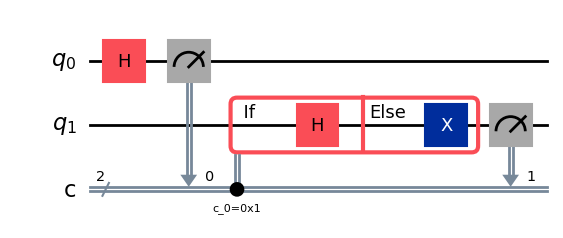

In [ ]:
qubits = QuantumRegister(2, "q")
clbits = ClassicalRegister(2, "c")
circuit = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits

circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)

circuit.draw("mpl")

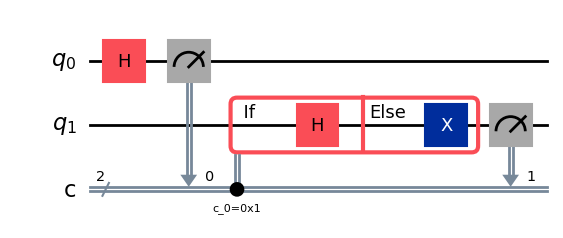

In [ ]:
# Same but without defining the registers explicitly:
circuit = QuantumCircuit(2, 2)
circuit.h(q0)
circuit.measure(q0, c0)

with circuit.if_test((c0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)

circuit.draw("mpl")

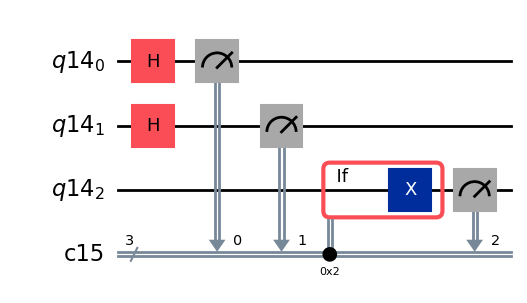

In [ ]:
# Multi cbit register if statement:
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits

circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.if_test((clbits, 0b010)):
    circuit.x(q2)
circuit.measure(q2, c2)

circuit.draw("mpl")

![title](img/5.png)

In [ ]:
# Answer: c)

In [64]:
# Convert positions 2 and 5 into binary:
a = [int(x) for x in format(2, "02b")]
b = [int(x) for x in format(5, "02b")]

a_long = [0]
a_long.extend(a)
a_long, b

([0, 1, 0], [1, 0, 1])

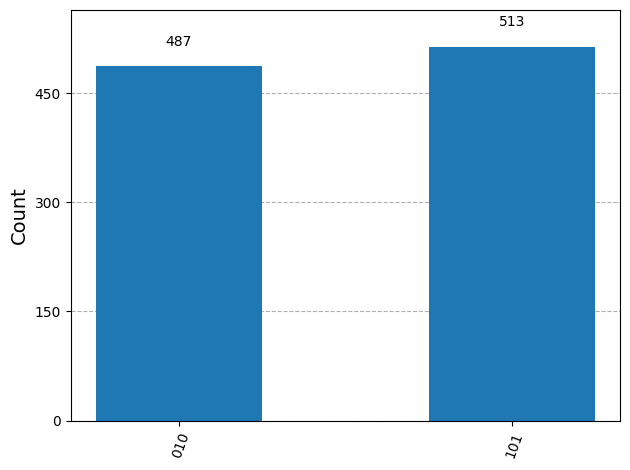

In [ ]:
state = Statevector([0, 0, 0.70710678, 0, 0, 0.70710678, 0, 0])
counts = state.sample_counts(shots=1000)
plot_histogram(counts)

![title](img/6.png)

In [ ]:
# Answer is d)

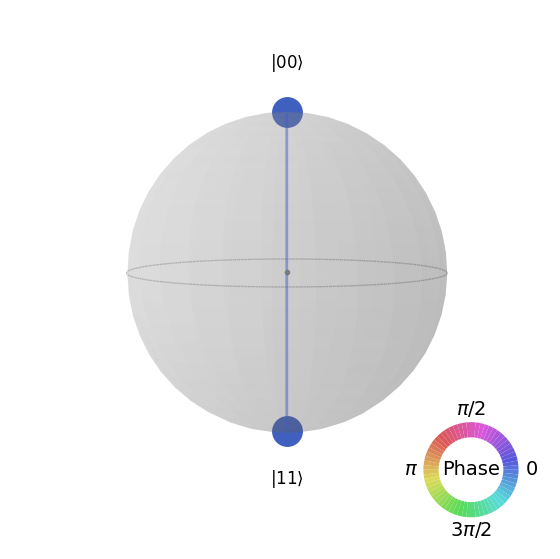

In [76]:
# HxI |00> = |+0> and then CNOT_01 |+0> = |00> + |11>:

from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
state = Statevector(qc)
plot_state_qsphere(state)

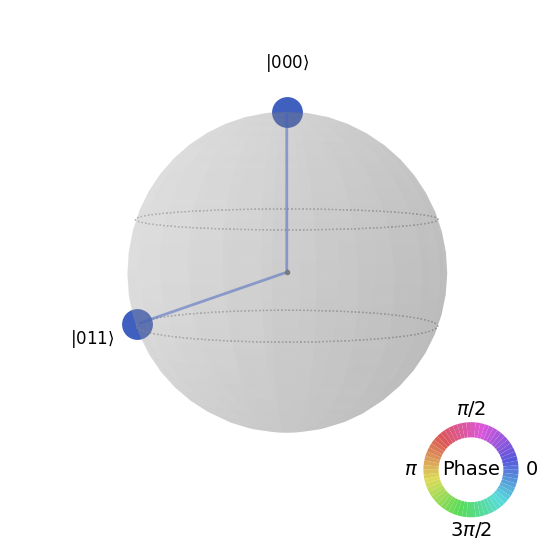

In [86]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
state = Statevector(qc)
plot_state_qsphere(state)

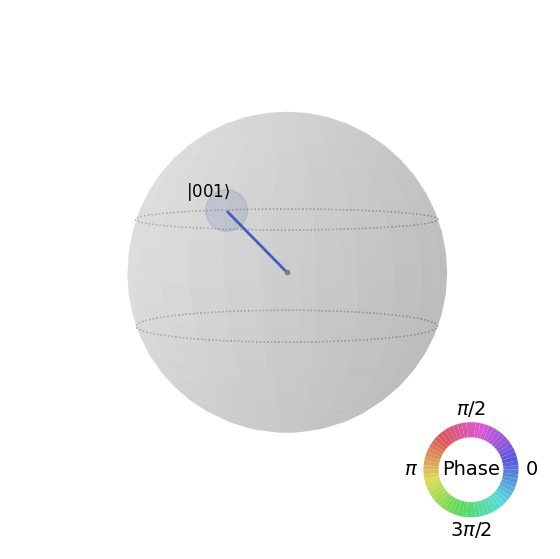

In [88]:
qc = QuantumCircuit(3)
qc.x(0)
state = Statevector(qc)
plot_state_qsphere(state)

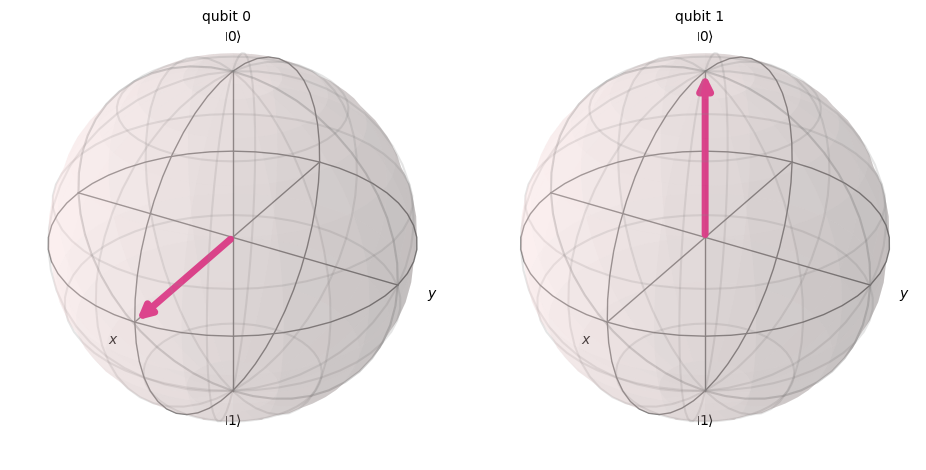

In [80]:
# If no entanglement, we can plot the Bloch spheres of each qubit separately:

qc = QuantumCircuit(2)
qc.h(0)
state = Statevector(qc)
plot_bloch_multivector(state)

### TASK 2.1: Visualize quantum circuits
- https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits

### TASK 2.2: Visualize quantum measurements
- https://quantum.cloud.ibm.com/docs/en/guides/classical-feedforward-and-control-flow
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/visualization
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.visualization.plot_gate_map

### TASK 2.3: Visualize quantum states
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.visualization.plot_bloch_multivector
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.visualization.plot_state_qsphere

---
## Section 3: Create quantum circuits (18%)
- https://quantum.cloud.ibm.com/docs/guides/construct-circuits
- https://quantum.cloud.ibm.com/docs/guides/circuit-library
- https://quantum.cloud.ibm.com/docs/guides/classical-feedforward-and-control-flow
- https://quantum.cloud.ibm.com/docs/guides/construct-circuits#parameterized-circuits
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.Parameter
- [Video: Intro to Transpilation, QDC24](http://youtube.com/watch?v=TmXlUUFMUgI)
- https://quantum.cloud.ibm.com/docs/en/guides/transpile
- https://quantum.cloud.ibm.com/docs/guides/optimize-for-hardware
- https://quantum.cloud.ibm.com/docs/guides/set-optimization

![title](img/7.png)

In [108]:
qc = QuantumCircuit(1)
theta = Parameter("theta")
qc.rx(theta, 0)

qc.assign_parameters({theta: 0.1})

In [ ]:
# For two operations you can set same or different parameters:
qc = QuantumCircuit(2)
theta = Parameter("theta")
qc.rx(theta, 0)
qc.rx(theta, 1)

qc.assign_parameters({theta: 0.1})

In [ ]:
# Answer: b)

![title](img/8.png)

In [ ]:
# Answer: c) Classical register

![title](img/9.png)

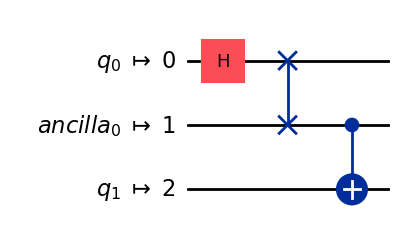

In [ ]:
# Due to the initial layout, you force the swap addition
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

pass_manager = generate_preset_pass_manager(
    optimization_level=3, coupling_map=[[0, 1], [1, 2]], basis_gates=["h", "cx", "swap"], initial_layout=[0, 2]
)
qc_transpiled = pass_manager.run(qc)
qc_transpiled.draw("mpl")

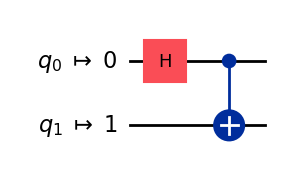

In [ ]:
# Without the forced initial layout, you get the simpler option
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

pass_manager = generate_preset_pass_manager(
    optimization_level=3, coupling_map=[[0, 1], [1, 2]], basis_gates=["h", "cx", "swap"], initial_layout=[0, 1]
)
qc_transpiled = pass_manager.run(qc)
qc_transpiled.draw("mpl")

In [ ]:
# Answer is a)

### TASK 3.1: Construct dynamic circuits
- https://quantum.cloud.ibm.com/docs/en/guides/classical-feedforward-and-control-flow

### TASK 3.2: Construct parameterized circuits
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.Parameter
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.ParameterExpression

### TASK 3.3: Transpile and optimize circuits
- https://quantum.cloud.ibm.com/docs/en/guides/transpiler-stages
- https://quantum.cloud.ibm.com/docs/en/guides/transpile-with-pass-managers
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/transpiler_passes

### TASK 3.4: Construct basic quantum circuits
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit

---
## Section 4: Run quantum circuits (15%)
- https://quantum.cloud.ibm.com/docs/guides/choose-execution-mode
- https://quantum.cloud.ibm.com/docs/guides/execute-on-hardware
- https://quantum.cloud.ibm.com/docs/guides/get-started-with-primitives

![title](img/10.png)

In [ ]:
# Answer b), e) and f) ???

![title](img/11.png)

In [ ]:
from qiskit_ibm_runtime import Session, QiskitRuntimeService

QiskitRuntimeService.save_account(name="main", token="", instance="", set_as_default=True, overwrite=True)
service = QiskitRuntimeService(name="main")

In [ ]:
# Answer: c)

backend = service.least_busy()
# session = Session(backend)

![title](img/12.png)

In [ ]:
# Answer: a) Standatd nd generalization

parameter_values = np.random.uniform(size=(3, 6))  # shape (3, 6)
observables = [
    [
        [SparsePauliOp(["XII"])],
        [SparsePauliOp(["IXI"])],
        [SparsePauliOp(["IIX"])],
    ],
    [
        [SparsePauliOp(["ZII"])],
        [SparsePauliOp(["IZI"])],
        [SparsePauliOp(["IIZ"])],
    ],
]

### TASK 4.1: Demonstrate an understanding of execution modes such as: session with dedicated, priority, and batch mode: (1. Sessions, 2. Batch)

- https://quantum.cloud.ibm.com/docs/en/guides/execute-on-hardware
- https://quantum.cloud.ibm.com/docs/en/guides/execution-modes
- https://quantum.cloud.ibm.com/docs/en/guides/choose-execution-mode
- https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-batch

### TASK 4.2: Demonstrate understanding of how to run quantum circuits with real hardware using Qiskit Runtime primitives and applying broadcasting rules: (1. Primitives, 2. Broadcasting rules, 3. Input / output, 4. Jobs)
- https://quantum.cloud.ibm.com/docs/en/guides/execute-on-hardware
- https://quantum.cloud.ibm.com/docs/en/guides/primitives
- https://quantum.cloud.ibm.com/docs/en/guides/primitive-input-output
- https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-session

---
## Section 5: Use the sampler primitive (12%)
- [Video: An Introduction to Qiskit Runtime Primitives Version 2, QSS24](https://www.youtube.com/watch?v=OuYz02clnx4)
- https://quantum.cloud.ibm.com/docs/api/qiskit-ibm-runtime/options-sampler-options

![title](img/13.png)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator


backend = AerSimulator()
sampler = Sampler(mode=backend)
sampler.options.default_shots

# Answer is c)

Unset

![title](img/14.png)

In [ ]:
sampler = Sampler(mode=backend)
sampler.run(pubs=[...], shots=1024)

# Answer a)

### TASK 5.1: Set sampler primitive options such as dynamical decoupling
- https://quantum.cloud.ibm.com/docs/en/guides/get-started-with-primitives
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/options-sampler-options
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/options-twirling-options
- https://quantum.cloud.ibm.com/docs/en/guides/error-mitigation-and-suppression-techniques

### TASK 5.2: Understand the theoretical background behind the sampler primitive
- https://quantum.cloud.ibm.com/docs/en/guides/get-started-with-primitives
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/sampler-v2
- https://quantum.cloud.ibm.com/docs/en/migration-guides/v2-primitives

---
## Section 6: Use the estimator primitive (12%)
- [Video: An Introduction to Qiskit Runtime Primitives Version 2, QSS24](https://www.youtube.com/watch?v=OuYz02clnx4)
- https://quantum.cloud.ibm.com/docs/api/qiskit-ibm-runtime/options-estimator-options

![title](img/15.png)

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(mode=backend)
estimator.run([(circuit, observables, parameter_values), (...)], precision=0.0001)

# Precision bigger, means less accurate results, so less shots
# Answer d)

![title](img/16.png)

In [ ]:
# ZNE and TREX are used with resilience levels

# So Answer c)

![title](img/17.png)

In [ ]:
# Pub is:
# - Estimator: circuit, observables, parameter_values, optional: precision
# - Sampler: circuit, parameter_values, optional: shots

# So Answer b)

### TASK 6.1: Set estimator primitive options (such as resilience levels)
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/options-estimator-options
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/options-twirling-options
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/options-resilience-options-v2
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/options-zne-options

### TASK 6.2: Understand the theoretical background behind the estimator primitive
- https://quantum.cloud.ibm.com/docs/en/guides/primitives
- https://quantum.cloud.ibm.com/docs/en/guides/error-mitigation-and-suppression-techniques

---
## Section 7: Retrieve and analyze the results of quantum circuits (10%)
- https://quantum.cloud.ibm.com/docs/guides/save-jobs
- https://quantum.cloud.ibm.com/docs/guides/monitor-job

![title](img/18.png)

In [ ]:
# Answer: c) I guess, although batches would do the same...
# I would say it groups them, enabling some result processing in between them.

![title](img/19.png)

In [ ]:
# {'id': '5a6d4397-42c6-4dc6-969a-b1c90286a715', 'backend_name': 'ibm_pinguino2', 'interactive_timeout': 60, 'max_time': 86400, 'active_timeout': 14400, 'state': 'open', 'accepting_jobs': True, 'last_job_started': None, 'last_job_completed': None, 'started_at': None, 'closed_at': None, 'activated_at': None, 'mode': 'dedicated', 'usage_time': None}

# Answer b) and c)

### TASK 7.1: Retrieve previous experiment results (session/Qiskit Runtime)
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.primitives.SamplerPubResult
- https://quantum.cloud.ibm.com/docs/en/guides/save-jobs
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/runtime-job
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.primitives.BasePrimitiveJob

### TASK 7.2: Monitor jobs
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/providers
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.providers.JobStatus
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/session

---
## Section 8: Operate with OpenQASM (6%)
- https://quantum.cloud.ibm.com/docs/guides/introduction-to-qasm
- https://openqasm.com/language/types.html
- https://photonq.org/docs/openqasm/syntax/
- https://quantum.cloud.ibm.com/docs/en/guides/interoperate-qiskit-qasm3
- https://quantum.cloud.ibm.com/docs/en/guides/interoperate-qiskit-qasm2
- https://quantum.cloud.ibm.com/docs/api/qiskit-runtime-rest

![title](img/20.png)

In [ ]:
# complex[float[64]]

# Answer a)

![title](img/21.png)

In [ ]:
from qiskit import QuantumCircuit
from qiskit.qasm3 import dumps

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

dumps(qc)

'OPENQASM 3.0;\ninclude "stdgates.inc";\nbit[2] meas;\nqubit[2] q;\nh q[0];\ncx q[0], q[1];\nbarrier q[0], q[1];\nmeas[0] = measure q[0];\nmeas[1] = measure q[1];\n'

In [ ]:
# Answer is b)

### TASK 8.1: Structure types in OpenQASM 3 programs
- https://openqasm.com/versions/3.0/language/types.html

### TASK 8.2: Interpret OpenQASM semantics
- https://quantum.cloud.ibm.com/docs/en/api/qiskit/qasm3

### TASK 8.3: Interoperate different versions of OpenQASM with Qiskit
- https://quantum.cloud.ibm.com/docs/en/guides/interoperate-qiskit-qasm3

### TASK 8.4: Interact with the Qiskit IBM Runtime REST API
- https://quantum.cloud.ibm.com/docs/en/api/qiskit-runtime-rest